In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [145]:
df = pd.read_excel("../data/titanic3.xls")
df = pd.get_dummies(df, columns=['sex'], prefix=['sex'])


In [146]:
#change names
df = df.rename(columns={'pclass': 'Passenger Class', 'survived': 'Survived', 'name': 'Name', 'sex_male': 'Male', 'sex_female': 'Female', 'age': 'Age', 'sibsp': 'Siblings/spouses aboard', 'parch': 'Parents/children aboard', 'ticket': 'Ticket number', 'fare': 'Passenger fare', 'cabin': 'Cabin no.', 'embarked': 'Port of Embarkation', 'boat': 'Lifeboat no.', 'body': 'Body no.', 'home.dest': 'Home/Destination'})

df.head(2)

,Passenger Class,Survived,Name,Age,Siblings/spouses aboard,Parents/children aboard,Ticket number,Passenger fare,Cabin no.,Port of Embarkation,Lifeboat no.,Body no.,Home/Destination,Female,Male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1


In [147]:
#change order of columns
new_order = ['Name', 'Age', 'Male', 'Female', 'Survived', 'Lifeboat no.', 'Body no.', 'Siblings/spouses aboard', 'Parents/children aboard', 'Ticket number', 'Passenger fare', 'Cabin no.', 'Port of Embarkation', 'Home/Destination']
df = df[new_order]

df.head(5)

,Name,Age,Male,Female,Survived,Lifeboat no.,Body no.,Siblings/spouses aboard,Parents/children aboard,Ticket number,Passenger fare,Cabin no.,Port of Embarkation,Home/Destination
0,"Allen, Miss. Elisabeth Walton",29.0000,0,1,1,2,NaN,0,0,24160,211.3375,B5,S,"St Louis, MO"
1,"Allison, Master. Hudson Trevor",0.9167,1,0,1,11,NaN,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,"Allison, Miss. Helen Loraine",2.0000,0,1,0,NaN,NaN,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,0,0,NaN,135.0,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,0,1,0,NaN,NaN,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     1309 non-null   object 
 1   Age                      1046 non-null   float64
 2   Male                     1309 non-null   uint8  
 3   Female                   1309 non-null   uint8  
 4   Survived                 1309 non-null   int64  
 5   Lifeboat no.             486 non-null    object 
 6   Body no.                 121 non-null    float64
 7   Siblings/spouses aboard  1309 non-null   int64  
 8   Parents/children aboard  1309 non-null   int64  
 9   Ticket number            1309 non-null   object 
 10  Passenger fare           1308 non-null   float64
 11  Cabin no.                295 non-null    object 
 12  Port of Embarkation      1307 non-null   object 
 13  Home/Destination         745 non-null    object 
dtypes: float64(3), int64(3),

<AxesSubplot: >

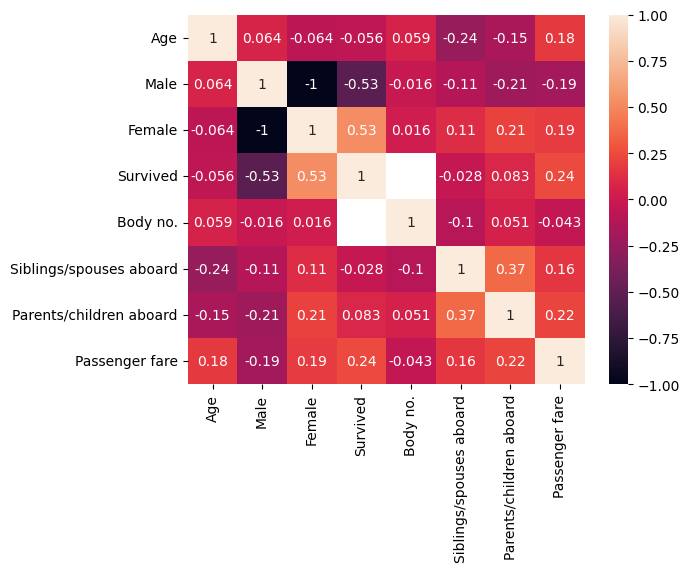

In [149]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

In [150]:
corr['Survived'].sort_values(ascending=False)

Survived                   1.000000
Female                     0.528693
Passenger fare             0.244265
Parents/children aboard    0.082660
Siblings/spouses aboard   -0.027825
Age                       -0.055513
Male                      -0.528693
Body no.                        NaN
Name: Survived, dtype: float64

In [151]:
def change_name(abbr):
    if abbr == 'S':
        return 'Southhampton'
    elif abbr == 'C':
        return 'Cherbourg'
    elif abbr == 'Q':
        return 'Queenstown'
    else:
        return abbr

df["Port of Embarkation"] = df["Port of Embarkation"].apply(change_name)

df.head(2)

,Name,Age,Male,Female,Survived,Lifeboat no.,Body no.,Siblings/spouses aboard,Parents/children aboard,Ticket number,Passenger fare,Cabin no.,Port of Embarkation,Home/Destination
0,"Allen, Miss. Elisabeth Walton",29.0000,0,1,1,2,NaN,0,0,24160,211.3375,B5,Southhampton,"St Louis, MO"
1,"Allison, Master. Hudson Trevor",0.9167,1,0,1,11,NaN,1,2,113781,151.5500,C22 C26,Southhampton,"Montreal, PQ / Chesterville, ON"


In [152]:
def print_second_part_of_string(string):
    if string is None or not isinstance(string, str):
        return math.nan
    string_object = str(string)
    parts = string_object.split("/")
    if len(parts) > 1:
        return parts[1]
    else:
        return math.nan

new_destination_column = df['Home/Destination'].copy()
df['Destination'] = new_destination_column
df['Destination'] = df["Destination"].apply(print_second_part_of_string)

df.head(2)

,Name,Age,Male,Female,Survived,Lifeboat no.,Body no.,Siblings/spouses aboard,Parents/children aboard,Ticket number,Passenger fare,Cabin no.,Port of Embarkation,Home/Destination,Destination
0,"Allen, Miss. Elisabeth Walton",29.0000,0,1,1,2,NaN,0,0,24160,211.3375,B5,Southhampton,"St Louis, MO",NaN
1,"Allison, Master. Hudson Trevor",0.9167,1,0,1,11,NaN,1,2,113781,151.5500,C22 C26,Southhampton,"Montreal, PQ / Chesterville, ON","Chesterville, ON"


In [153]:
def print_first_part_of_string(string):
    if string is None or not isinstance(string, str):
        return math.nan
    string_object = str(string)
    parts = string_object.split("/")
    return parts[0]

df['Home/Destination'] = df["Home/Destination"].apply(print_first_part_of_string)
df = df.rename(columns={'Home/Destination':'Home'})

df.head(2)

,Name,Age,Male,Female,Survived,Lifeboat no.,Body no.,Siblings/spouses aboard,Parents/children aboard,Ticket number,Passenger fare,Cabin no.,Port of Embarkation,Home,Destination
0,"Allen, Miss. Elisabeth Walton",29.0000,0,1,1,2,NaN,0,0,24160,211.3375,B5,Southhampton,"St Louis, MO",NaN
1,"Allison, Master. Hudson Trevor",0.9167,1,0,1,11,NaN,1,2,113781,151.5500,C22 C26,Southhampton,"Montreal, PQ","Chesterville, ON"
